In [0]:
from scipy.stats import norm
from scipy.optimize import bisect
from numpy import log, sqrt, exp
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
S0 = 42
K = 40
r = .1
sig = .2
T = .5

In [0]:
def get_optionprice(S0,K,r,sig,T, optionType, vol = False):
  D1 = (log(S0/K) + (r + sig**2/2)*T)/(sig*sqrt(T))
  D2 = D1 - (sig*sqrt(T))
  Kd = K*exp(-r*T)
  # This part of the code is used to estimate the implied volatility
  if vol:
    ## Implied volatility for a call function
    if optionType == 'call':
      return S0*norm.cdf(D1)-Kd*norm.cdf(D2) - vol
    ## Implied volatility for a put option
    elif optionType == 'put':
      return -S0*norm.cdf(-D1)+Kd*norm.cdf(-D2) -vol
  
  # This part of the code if for the usual estimation of an option price
  # for both call and put options
  
  ## Estimation of call option price
  if optionType == 'call':
    c = S0*norm.cdf(D1)-Kd*norm.cdf(D2)
    return c

  ## Estimation of put option price
  elif optionType == 'put':
    p = -S0*norm.cdf(-D1)+Kd*norm.cdf(-D2)
    return p

In [4]:
print(get_optionprice(S0,K,r,sig,T,'put'))
print(get_optionprice(S0,K,r,sig,T,'call'))

0.8085993729000922
4.759422392871532


In [0]:
def implied_volatility(S0,K,r,T, optionType, optPrice):
  # Function to estimate the implied volatility
  def func(x):
    # function returns a value of the residual given a volatility
    y = get_optionprice(S0,K,r,x,T,'call',optPrice)
    return y
  # use bisect to find the value for the volatility
  return bisect(func,0,1)

In [0]:
print('Implied volatility estimate: ',implied_volatility(21,20,.1,.25,'call',
                                                         1.875))

Implied volatility estimate:  0.2345129139994242


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


Text(0.5, 1.0, 'Call option price vs. Volatility')

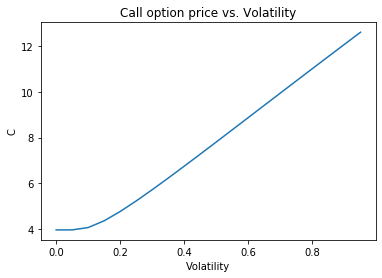

In [0]:

siglist = []
clist = []
for vsig in range(0,100,5):
  siglist.append(vsig/100)
  clist.append(get_optionprice(S0,K,r,vsig/100,T,'call'))
sns.lineplot(siglist,clist)

plt.xlabel('Volatility')
plt.ylabel('C')
plt.title('Call option price vs. Volatility')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


Text(0.5, 1.0, 'Call option price vs. Strike price')

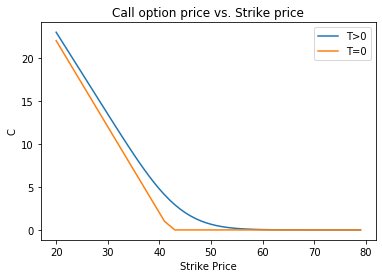

In [0]:
clist = []
klist = []
for vk in range(20,80):
  klist.append(vk)
  clist.append(get_optionprice(S0,vk,r,sig,T,'call'))
sns.lineplot(klist,clist)
clist = []
klist = []
for vk in range(20,80):
  klist.append(vk)
  clist.append(get_optionprice(S0,vk,r,sig,0,'call'))
sns.lineplot(klist,clist)
plt.xlabel('Strike Price')
plt.ylabel('C')
plt.legend(['T>0','T=0'])
plt.title('Call option price vs. Strike price')

Text(0.5, 1.0, 'Call option price vs. Time to maturity')

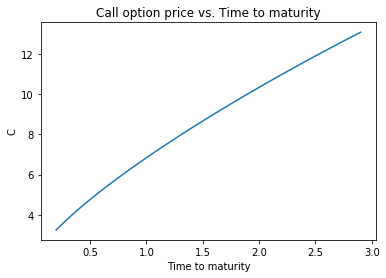

In [0]:
clist = []
tlist = []
for vt in range(20,300,10):
  tlist.append(vt/100)
  clist.append(get_optionprice(S0,K,r,sig,vt/100,'call'))
sns.lineplot(tlist,clist)
plt.xlabel('Time to maturity')
plt.ylabel('C')
plt.title('Call option price vs. Time to maturity')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


Text(0.5, 1.0, 'Call option price vs. Implied volatility')

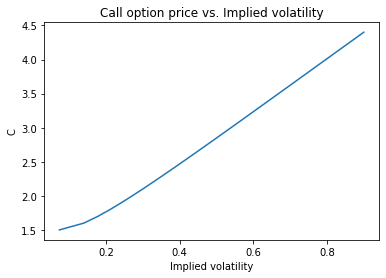

In [0]:
clist = []
vlist = []
for vc in range(15,45):
  clist.append(vc/10)
  vlist.append(implied_volatility(21,20,.1,.25,'call',vc/10))
sns.lineplot(vlist,clist)
plt.xlabel('Implied volatility')
plt.ylabel('C')
plt.title('Call option price vs. Implied volatility')